# Import necessary libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
%matplotlib inline

# Extract dataset, check for null values, clean

In [2]:
data=pd.read_excel('books_dataset.xlsx')
data.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9780000000000,eng,652,2095690,27591,2006-09-16 00:00:00,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9780000000000,eng,870,2153167,29221,2004-09-01 00:00:00,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780000000000,eng,352,6333,244,2003-11-01 00:00:00,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780000000000,eng,435,2339585,36325,2004-05-01 00:00:00,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9780000000000,eng,2690,41428,164,2004-09-13 00:00:00,Scholastic,NaN
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9780000000000,en-US,152,19,1,2005-04-26 00:00:00,Nimble Books,NaN
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9780000000000,eng,3342,28242,808,2005-09-12 00:00:00,Scholastic,NaN
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780000000000,eng,815,3628,254,2005-11-01 00:00:00,Gramercy Books,NaN
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9780000000000,eng,815,249558,4080,2002-04-30 00:00:00,Del Rey Books,NaN
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9780000000000,eng,215,4930,460,2004-08-03 00:00:00,Crown,NaN


In [3]:
data.shape

(11127, 13)

In [4]:
data.info

<bound method DataFrame.info of        bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11122   45631   Expelled from Eden: A William T. Vollmann Reader   
11123   45633                        You Bright and Risen Angels   
11124   45634                    The Ice-Shirt (Seven Dreams #1)   
11125   45639                                        Poor People   
11126   45641                        Las aventuras de Tom Sawyer   

                                                 authors average_rating  \
0                            J.K. Rowling/Mary GrandPrÃ©           4.57   
1

In [5]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'Unnamed: 12'],
      dtype='object')

In [6]:
data.isna().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
num_pages             False
ratings_count         False
text_reviews_count    False
publication_date      False
publisher             False
Unnamed: 12            True
dtype: bool

In [7]:
data.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793647e+04,541.859531
std,13093.358023,1.124794e+05,2576.175586
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,46.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [8]:
data['title'].unique()

array(['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
       'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
       'Harry Potter and the Chamber of Secrets (Harry Potter  #2)', ...,
       'The Ice-Shirt (Seven Dreams #1)', 'Poor People',
       'Las aventuras de Tom Sawyer'], dtype=object)

In [9]:
data['authors'].unique()

array(['J.K. Rowling/Mary GrandPrÃ©', 'J.K. Rowling',
       'W. Frederick Zimmerman', ..., 'C.S. Lewis/Ana FalcÃ£o Bastos',
       'C.S. Lewis/Pauline Baynes/Ana FalcÃ£o Bastos',
       'William T. Vollmann/Larry McCaffery/Michael Hemmingson'],
      dtype=object)

In [10]:
data['publisher'].unique()

array(['Scholastic Inc.', 'Scholastic', 'Nimble Books', ..., 'Suma',
       'Panamericana Editorial', 'Editorial PresenÃ§a'], dtype=object)

In [11]:
data.drop_duplicates(['bookID','title'],inplace=True)

In [12]:
data.shape

(11127, 13)

In [13]:
data['bookID'] = data['bookID'].astype('int64')
data['title'] = data['title'].astype('str')
data['publisher'] = data['publisher'].astype('str')


In [14]:
print(data['average_rating'].unique())


[4.57 4.49 4.42 4.56 4.78 3.74 4.73 4.38 4.22 4.21 3.44 3.87 4.07 3.9 3.83
 3.86 3.91 3.93 4.59 4.5 4.36 4.53 3.84 3.72 4 3.88 4.33 3.45 3.76 3.6
 4.06 4.17 3.55 3.98 4.13 3.95 4.24 4.34 3.92 4.23 3.75 3.94 3.77 4.46
 3.68 3.99 3.25 3.89 3.82 3.78 4.01 4.35 4.28 3.34 3.67 3.48 3.5 3.62 4.27
 3.39 4.12 4.08 4.05 3.85 2.99 4.19 3.71 4.2 3.65 3.4 4.11 3.42 4.02 3.69
 4.1 3.66 4.61 4.04 3.97 4.14 3.57 3.43 3.22 3.64 3.96 3.8 3.81 3.79 3.23
 4.15 4.39 4.03 3.73 3.51 3.63 3.09 3.59 4.29 0 4.25 4.26 3.61 4.16 4.55
 4.52 3.41 4.7 4.18 3.58 4.51 3.15 3.31 4.09 3.49 3.56 4.47 4.44 3.7 4.32
 4.4 4.31 4.43 2.8 3.46 2.83 4.62 2.67 4.45 4.3 5 3.1 3.08 3.27 3.33 3
 4.67 4.63 3.52 3.36 3.54 3.17 4.37 3.29 4.64 3.38 3.37 3.16 3.53 2.88
 2.98 3.35 3.3 3.24 4.41 4.48 4.54 4.6 3.32 3.13 2 3.2 4.58 2.82 3.28 2.62
 2.92 3.47 3.02 1 3.14 3.12 3.18 2.86 3.26 3.19 3.03 3.07 3.11 4.91 2.55
 2.81 4.75
 ' one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)'
 3.21 4.71 4.8 

In [15]:
row_index1 = data.index[data['average_rating'] == ' one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)']
row_index2 = data.index[data['average_rating'] == ' Rawles']
row_index3 = data.index[data['average_rating'] == ' Son & Ferguson']


In [16]:
data.loc[row_index1]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9780000000000,eng,400,26,4,2004-04-06 00:00:00,Cold Spring Press


In [17]:
data.drop(row_index1,inplace=True)
data.drop(row_index2,inplace=True)
data.drop(row_index3,inplace=True)


In [18]:
data['average_rating'] = data['average_rating'].astype('float')

# Data Visualisation

# Finding overall count of publishers for the entire data

<Axes: xlabel='publisher', ylabel='count'>

c:\Users\shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 144 (\x90) missing from current font.
  func(*args, **kwargs)
c:\Users\shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 143 (\x8f) missing from current font.
  func(*args, **kwargs)
c:\Users\shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 141 (\x8d) missing from current font.
  func(*args, **kwargs)
c:\Users\shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
c:\Users\shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 157 (\x9d) missing from current font.
  func(*args, **kwargs)
c:\Users\shree\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtool

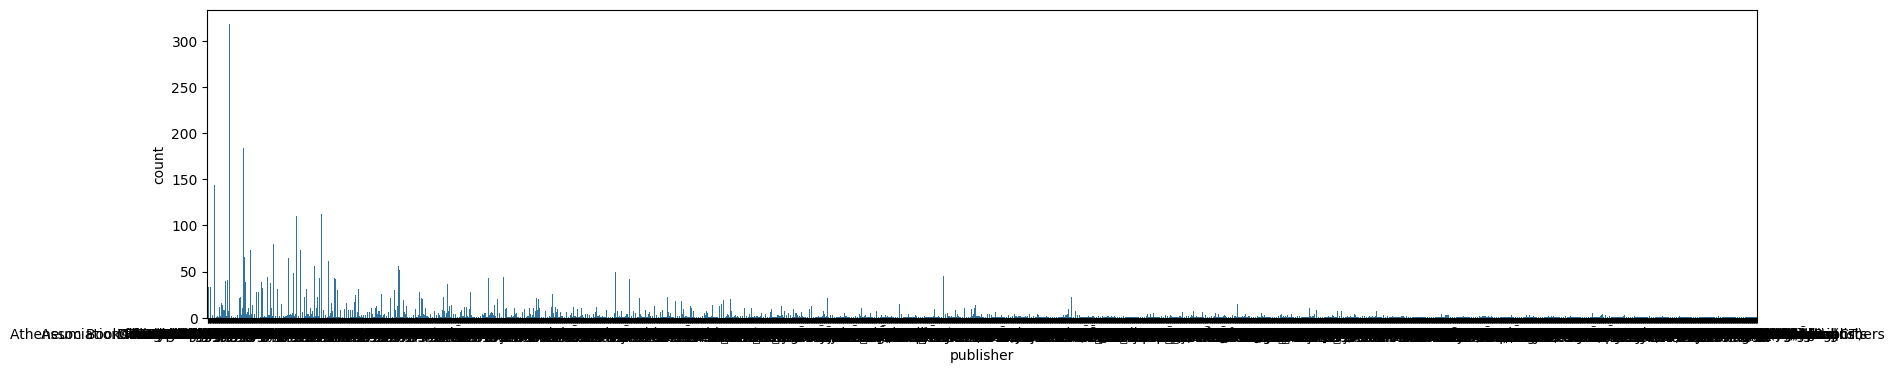

In [19]:
fig_dims=(20,4)
fig, ax=plt.subplots(figsize=fig_dims)
sns.countplot(x='publisher', ax=ax, data=data)

# Finding overall count of publishers for the the first 50 rows for better visualization

<Axes: xlabel='publisher', ylabel='count'>

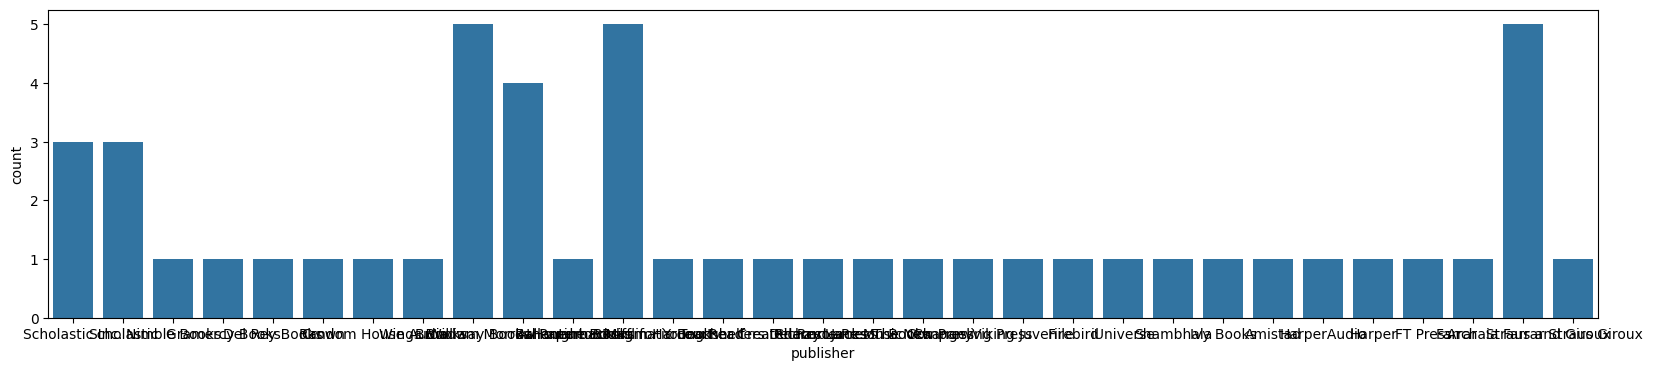

In [20]:
data_visualise=data.head(50)
fig_dims=(20,4)
fig, ax=plt.subplots(figsize=fig_dims)
sns.countplot(x='publisher', ax=ax, data=data_visualise)

# Finding maximum and minimum attributes

In [21]:
data.iloc[data['ratings_count'].idxmax()]

bookID                                                  41890
title                           Who Wants a Cheap Rhinoceros?
authors                                      Shel Silverstein
average_rating                                           3.96
isbn                                                689851138
isbn13                                          9780000000000
language_code                                             eng
num_pages                                                  64
ratings_count                                            1907
text_reviews_count                                        124
publication_date                          2002-08-01 00:00:00
publisher             Simon  Schuster Books for Young Readers
Unnamed: 12                                               NaN
Name: 10343, dtype: object

In [22]:
data.iloc[data['ratings_count'].idxmin()]

bookID                                                      797
title                                     Lonely Planet Londres
authors               Lonely Planet/Sarah Johnstone/Tom Masters
average_rating                                             4.03
isbn                                                 8408064762
isbn13                                            9790000000000
language_code                                               spa
num_pages                                                   480
ratings_count                                                 0
text_reviews_count                                            0
publication_date                            2006-05-01 00:00:00
publisher                                            Geoplaneta
Unnamed: 12                                                 NaN
Name: 264, dtype: object

In [23]:
data.iloc[data['num_pages'].idxmax()]

bookID                                                            24524
title                 The Final Unfinished Voyage of Jack Aubrey (Au...
authors                                    Patrick O'Brian/Richard Snow
average_rating                                                     3.99
isbn                                                         039306025X
isbn13                                                    9780000000000
language_code                                                       eng
num_pages                                                           144
ratings_count                                                      2194
text_reviews_count                                                  121
publication_date                                    2004-10-17 00:00:00
publisher                                         W. W. Norton  Company
Unnamed: 12                                                         NaN
Name: 6502, dtype: object

In [24]:
data.iloc[data['num_pages'].idxmin()]

bookID                                                              955
title                 The 5 Love Languages / The 5 Love Languages Jo...
authors                                                    Gary Chapman
average_rating                                                      4.7
isbn                                                          802415318
isbn13                                                    9780000000000
language_code                                                       eng
num_pages                                                             0
ratings_count                                                        22
text_reviews_count                                                    4
publication_date                                    2005-01-01 00:00:00
publisher                                              Moody Publishers
Unnamed: 12                                                         NaN
Name: 306, dtype: object

# Finding overall count of authors for the entire data

In [25]:
data_review=data.authors.value_counts()
sns.barplot(y=data_review.index, x=data_review)

# Finding overall count of authors for the the first 50 rows for better visualization

<Axes: xlabel='count', ylabel='authors'>

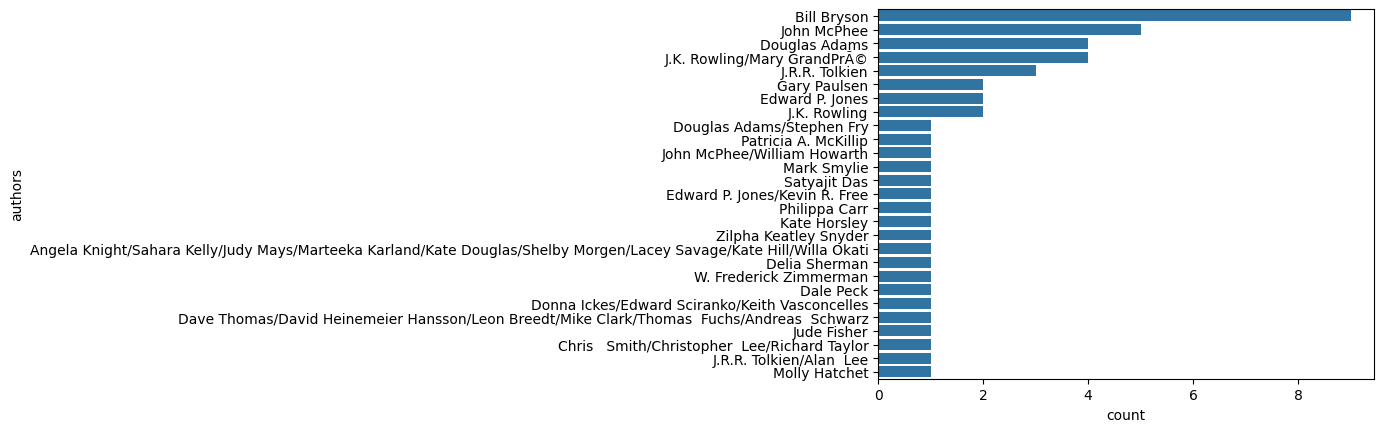

In [ ]:
data_review=data_visualise.authors.value_counts()
sns.barplot(y=data_review.index, x=data_review) 

# Constructing Pivot table for the Recommendation System

In [ ]:
book_pivot_table=data.pivot_table(columns='bookID', index='title',values='average_rating')

In [ ]:
book_pivot_table

bookID,1,2,4,5,8,9,10,12,13,14,...,45617,45623,45625,45626,45630,45631,45633,45634,45639,45641
title,,,,,,,,,,,,,,,,,,,,,
said the shotgun to the head.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$30 Film School: How to Write Direct Produce Shoot Edit Distribute Tour With and Sell Your Own No-Budget Digital Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 000 Places to See Before You Die,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 lb Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
é‹¼ä¹‹éŠé‡‘è¡“å¸« 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
é‹¼ä¹‹éŠé‡‘è¡“å¸« 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
é‹¼ä¹‹éŠé‡‘è¡“å¸« 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
book_pivot_table.shape

(10349, 11124)

In [ ]:
book_pivot_table.fillna(0,inplace=True)

In [ ]:
book_pivot_table

bookID,1,2,4,5,8,9,10,12,13,14,...,45617,45623,45625,45626,45630,45631,45633,45634,45639,45641
title,,,,,,,,,,,,,,,,,,,,,
said the shotgun to the head.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$30 Film School: How to Write Direct Produce Shoot Edit Distribute Tour With and Sell Your Own No-Budget Digital Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1 000 Places to See Before You Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 lb Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
é‹¼ä¹‹éŠé‡‘è¡“å¸« 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
é‹¼ä¹‹éŠé‡‘è¡“å¸« 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
é‹¼ä¹‹éŠé‡‘è¡“å¸« 6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Using clustering algorithm - Nearest neighbour for finding similar books to recommend from the dataset

In [ ]:
book_sparse=csr_matrix(book_pivot_table)
book_sparse

<10349x11124 sparse matrix of type '<class 'numpy.float64'>'
	with 11099 stored elements in Compressed Sparse Row format>

In [ ]:

model=NearestNeighbors(algorithm='brute')

In [ ]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
book_names=book_pivot_table.index

In [ ]:
book_names=np.unique(book_names)

In [ ]:
book_names

Index(['  said the shotgun to the head.',
       '$30 Film School: How to Write  Direct  Produce  Shoot  Edit  Distribute  Tour With  and Sell Your Own No-Budget Digital Movie',
       ''Salem's Lot', '1 000 Places to See Before You Die', '10 lb Penalty',
       '100 Great Fantasy Short Short Stories', '100 Love Sonnets',
       '100 Years of Lynchings', '1000 Record Covers',
       '1000 Rings: Inspiring Adornments for the Hand',
       ...
       'é‹¼ã®éŒ¬é‡‘è¡“å¸« 5 (Fullmetal Alchemist  #5)',
       'é‹¼ã®éŒ¬é‡‘è¡“å¸« 8 (Fullmetal Alchemist 8)', 'é‹¼ä¹‹éŠé‡‘è¡“å¸« 1',
       'é‹¼ä¹‹éŠé‡‘è¡“å¸« 10', 'é‹¼ä¹‹éŠé‡‘è¡“å¸« 2', 'é‹¼ä¹‹éŠé‡‘è¡“å¸« 4',
       'é‹¼ä¹‹éŠé‡‘è¡“å¸« 5', 'é‹¼ä¹‹éŠé‡‘è¡“å¸« 6', 'é‹¼ä¹‹éŠé‡‘è¡“å¸« 7',
       'é‹¼ä¹‹éŠé‡‘è¡“å¸« 9'],
      dtype='object', name='title', length=10349)

In [ ]:
def recommendation(book_title):
    book_id=np.where(book_pivot_table.index ==book_title)[0][0]
    distance, suggestion = model.kneighbors(book_pivot_table.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)
    for i in range(len(suggestion)):
        books=book_pivot_table.index[suggestion[i]]
        for j in books:
            print(j)


In [ ]:
book_names

Index(['  said the shotgun to the head.',
       '$30 Film School: How to Write  Direct  Produce  Shoot  Edit  Distribute  Tour With  and Sell Your Own No-Budget Digital Movie',
       ''Salem's Lot', '1 000 Places to See Before You Die', '10 lb Penalty',
       '100 Great Fantasy Short Short Stories', '100 Love Sonnets',
       '100 Years of Lynchings', '1000 Record Covers',
       '1000 Rings: Inspiring Adornments for the Hand',
       ...
       'é‹¼ã®éŒ¬é‡‘è¡“å¸« 5 (Fullmetal Alchemist  #5)',
       'é‹¼ã®éŒ¬é‡‘è¡“å¸« 8 (Fullmetal Alchemist 8)', 'é‹¼ä¹‹éŠé‡‘è¡“å¸« 1',
       'é‹¼ä¹‹éŠé‡‘è¡“å¸« 10', 'é‹¼ä¹‹éŠé‡‘è¡“å¸« 2', 'é‹¼ä¹‹éŠé‡‘è¡“å¸« 4',
       'é‹¼ä¹‹éŠé‡‘è¡“å¸« 5', 'é‹¼ä¹‹éŠé‡‘è¡“å¸« 6', 'é‹¼ä¹‹éŠé‡‘è¡“å¸« 7',
       'é‹¼ä¹‹éŠé‡‘è¡“å¸« 9'],
      dtype='object', name='title', length=10349)

# Recommending books from random book names selected from the dataset

### Book 1

In [ ]:
book=random.choice(book_names)
book

'Inferno'

In [ ]:
recommendation(book)

Inferno
Canopy: A Work for Voice and Light in Harvard Yard
Anthony Thwaite: In Conversation With Peter Dale and Ian Hamilton
American Film Guide
Classroom Interactions as Cross-Cultural Encounters: Native Speakers in EFL Lessons
American Writers  Supplement VIII


### Book 2

In [ ]:
book=random.choice(book_names)
book

'The Design and Implementation of the 4.3BSD UNIX Operating System'

In [ ]:
recommendation(book)

The Design and Implementation of the 4.3BSD UNIX Operating System
Canopy: A Work for Voice and Light in Harvard Yard
Anthony Thwaite: In Conversation With Peter Dale and Ian Hamilton
American Film Guide
Classroom Interactions as Cross-Cultural Encounters: Native Speakers in EFL Lessons
American Writers  Supplement VIII


### Book 3

In [ ]:
book=random.choice(book_names)
book

"Cook's Illustrated 1995 (Cook's Illustrated Annuals)"

In [ ]:
recommendation(book)

Cook's Illustrated 1995 (Cook's Illustrated Annuals)
Canopy: A Work for Voice and Light in Harvard Yard
Anthony Thwaite: In Conversation With Peter Dale and Ian Hamilton
American Film Guide
Classroom Interactions as Cross-Cultural Encounters: Native Speakers in EFL Lessons
American Writers  Supplement VIII


### Book 4

In [ ]:
book=random.choice(book_names)
book

'Voices From the Street'

In [ ]:
recommendation(book)

Voices From the Street
Canopy: A Work for Voice and Light in Harvard Yard
Anthony Thwaite: In Conversation With Peter Dale and Ian Hamilton
American Film Guide
Classroom Interactions as Cross-Cultural Encounters: Native Speakers in EFL Lessons
American Writers  Supplement VIII


### Book 5

In [ ]:
book=random.choice(book_names)
book

'Shadow of the Almighty: The Life and Testament of Jim Elliot'

In [ ]:
recommendation(book)

Shadow of the Almighty: The Life and Testament of Jim Elliot
Canopy: A Work for Voice and Light in Harvard Yard
Anthony Thwaite: In Conversation With Peter Dale and Ian Hamilton
American Film Guide
Classroom Interactions as Cross-Cultural Encounters: Native Speakers in EFL Lessons
American Writers  Supplement VIII
